<a href="https://colab.research.google.com/github/aadam873/Mytest/blob/master/2023_BootCamp_Day3_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Acknowledgments/Credits: The material for this bootcamp is based on lectures from Univeristy of Maryland, College Park GRADMAP and Scientific Computing from Scratch 2022. 

## **Please make your own copy of this notebook before making changes or beginning the exercises!**

#Day 3 Python Boot Camp
## Agenda
1. [**Scikit-Learn Linear Regression**](#linreg)
2. [**Scipy Curve Fitting**](#curvefit)
3. [**Basic Image Processing**](#improc)

## Scikit-Learn Linear Regression
<a id='linreg'></a>

**Scikit-Learn**

Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

### **Linear Regression**

In [ ]:
y = np.linspace(1,10,20)
x = y*y

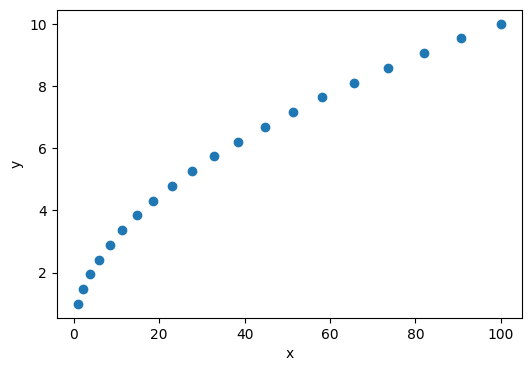

In [ ]:
# data to be fitted/modeled

plt.figure(figsize=(6,4))

plt.scatter(x, y)

plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

$y = \theta_0 + \theta_1x$

In [ ]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [ ]:
reg_1 = LinearRegression().fit(x, y)

In [ ]:
y_pred_1 = reg_1.predict(x)

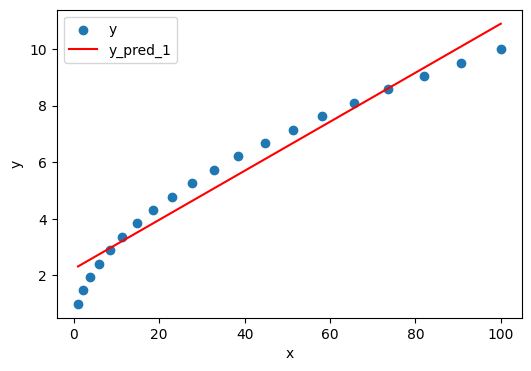

In [ ]:
plt.figure(figsize=(6,4))

plt.scatter(x, y, label='y')
plt.plot(x, y_pred_1, label='y_pred_1', color='r')

plt.legend()

plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [ ]:
print('theta_0 =', reg_1.intercept_)
print('theta_1 =', reg_1.coef_)

theta_0 = [2.23176646]
theta_1 = [[0.08666635]]


$y = \theta_0 + \theta_1x + \theta_2x^2$

In [ ]:
x_sq = x*x
x_2 = np.concatenate((x, x_sq), axis=1)

In [ ]:
reg_2 = LinearRegression().fit(x_2, y)

In [ ]:
y_pred_2 = reg_2.predict(x_2)

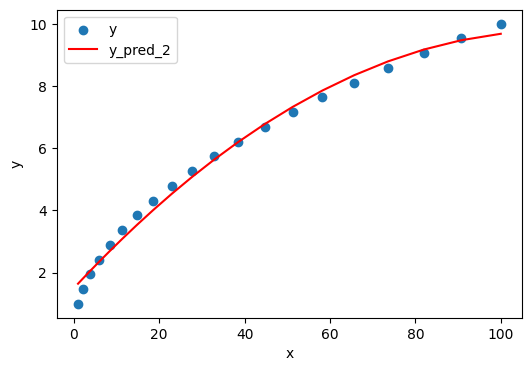

In [ ]:
plt.figure(figsize=(6,4))

plt.scatter(x, y, label='y')
plt.plot(x, y_pred_2, label='y_pred_2', color='r')

plt.legend()

plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [ ]:
print('theta_0 =', reg_2.intercept_)
print('theta_1,2 =', reg_2.coef_)

theta_0 = [1.49750995]
theta_1,2 = [[ 0.14727555 -0.00065485]]


$y = \theta_0 + \theta_1x + \theta_2x^2 + \theta_3x^3$



In [ ]:
x_cu = x*x*x
x_3 = np.concatenate((x_2, x_cu), axis=1)

In [ ]:
reg_3 = LinearRegression().fit(x_3, y)

In [ ]:
y_pred_3 = reg_3.predict(x_3)

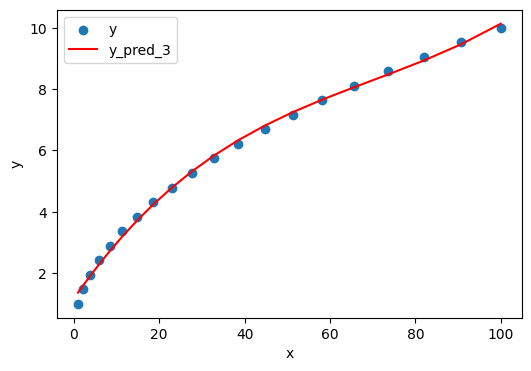

In [ ]:
plt.figure(figsize=(6,4))

plt.scatter(x, y, label='y')
plt.plot(x, y_pred_3, label='y_pred_3', color='r')

plt.legend()

plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [ ]:
print('theta_0 =', reg_3.intercept_)
print('theta_1,2,3 =', reg_3.coef_)

theta_0 = [1.16399767]
theta_1,2,3 = [[ 2.01283465e-01 -2.13480467e-03  1.01869167e-05]]


### **Putting it all together**

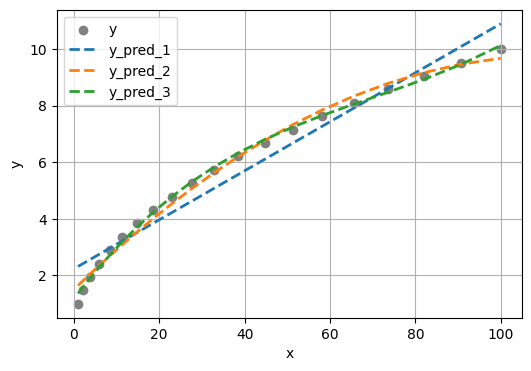

In [ ]:
plt.figure(figsize=(6,4))

plt.scatter(x, y, label='y', color='gray')
plt.plot(x, y_pred_1, label='y_pred_1', linestyle='--', linewidth=2)
plt.plot(x, y_pred_2, label='y_pred_2', linestyle='--', linewidth=2)
plt.plot(x, y_pred_3, label='y_pred_3', linestyle='--', linewidth=2)

plt.legend()
plt.grid()

plt.xlabel('x')
plt.ylabel('y')

plt.show()

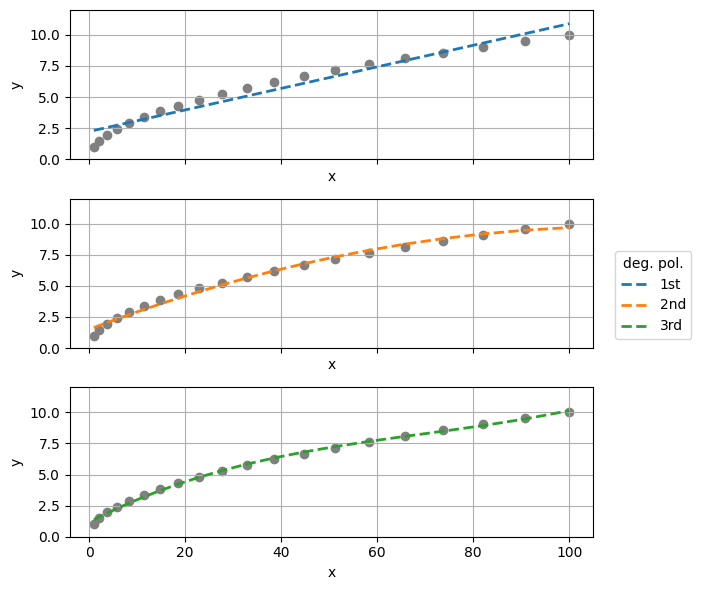

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(6,6), sharex=True)

ax[0].plot(x, y_pred_1, label='1st', linestyle='--', linewidth=2, color='tab:blue')
ax[1].plot(x, y_pred_2, label='2nd', linestyle='--', linewidth=2, color='tab:orange')
ax[2].plot(x, y_pred_3, label='3rd', linestyle='--', linewidth=2, color='tab:green')

fig.legend(title='deg. pol.', loc='center left', bbox_to_anchor=(1,0.5))

for n in range(3):
  ax[n].scatter(x, y, label='y', color='gray')
  ax[n].set_xlabel('x')
  ax[n].set_ylabel('y')
  ax[n].set_ylim(0,12)
  ax[n].grid()

fig.tight_layout()
fig.show()

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [ ]:
# mean squared error

print('1st degree polynoial MSE =', mse(y, y_pred_1))
print('2nd degree polynoial MSE =', mse(y, y_pred_2))
print('3rd degree polynoial MSE =', mse(y, y_pred_3))

1st degree polynoial MSE = 0.34818416377526135
2nd degree polynoial MSE = 0.06412656049008185
3rd degree polynoial MSE = 0.018223653808832334


In [ ]:
# coefficient of determination

print('1st degree polynoial R^2 =',r2_score(y, y_pred_1))
print('2nd degree polynoial R^2 =',r2_score(y, y_pred_2))
print('3rd degree polynoial R^2 =',r2_score(y, y_pred_3))

1st degree polynoial R^2 = 0.9533298122629279
2nd degree polynoial R^2 = 0.9914045527385428
3rd degree polynoial R^2 = 0.9975573232989925


## Scipy Curve Fitting
<a id='curevefit'></a>

### Data Introspection
One of the most common tasks in experimental physics is trying to model experimental data with a function. This lecture will walk through how to accomplish this with python. First, let's import some data.

In [ ]:
data_filename = "https://raw.githubusercontent.com/astroumd/GradMap/master/notebooks/Lectures2021/Lecture3/Data/photopeak.txt"
x_data, y_data = np.loadtxt(data_filename, usecols=(0, 1), unpack=True)
print(x_data, y_data)

[0.549626 0.946    0.8987   0.8514   0.8041   0.7568   0.7095   0.6622
 0.6149   0.5676   0.5203   0.68112  0.64328  0.73788  0.58652 ] [ 272.   32.   50.   50.  150.  733. 3126. 5413. 2125.  368.  391. 5009.
 4478. 1516.  539.]


Let's plot it to see what it looks like!

In python there are multiple plotting libraries, but the moset common one is `matplotlib`, and that is the one we will be using today.

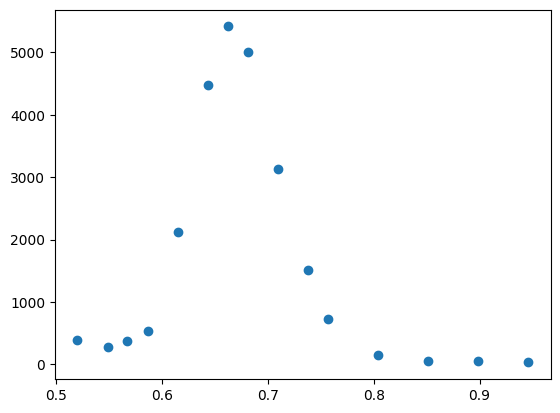

In [ ]:
# Import the matplotlib package. Really, we only need the pyplot sub-package, so we import it this way. Renaming it to 'plt' is common practice.
import matplotlib.pyplot as plt

# The most basic kind of scatter plot you can plot using matplotlib is done like this:
plt.scatter(x_data, y_data)

# At the end of a cell where you are plotting things, this line tells python that you want do display the plots you defined in the cell.
plt.show()

Usually, you will want to have some theory-based motivation for the function you choose to model some set of data, but for this example, we don't know anything about the data other than the points themselves. In this type of situation, trying to fit a simple function to the data is not a bad first step in trying to understand it. What function do you think might fit this data based on how it looks in the plot?

<details>
<summary>Answer</summary>
It looks like the data is shaped like a normal (gaussian) distribution, so let's try to fit it to that! First, let's define a gaussian function for fitting.
    
The equation for a Gaussian curve is the following:

$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{-(x-\mu)^2}{2\sigma^2}}$

where $\mu$ is the mean and $\sigma$ is the standard deviation. We also want to be able to scale our function to fit the scale of the data, so we should multiply the equation by some amplitude, A.
</details>

In [ ]:
# While not necessary in python, defining datatypes using what are called 'type hints' has become the norm for modern python.
# It has a lot of benefits, and if you have time in the future, you should consider learning to use them.
from typing import Union

# The docstring in this function is formatted in 'google style'. 'Numpy style' is another popular way to write docstrings.
# Choosing one of these styles and using them for all of your docstrings will make your code much easier to read and maintain.
def gauss(x: Union[float, np.array], mean: float, std: float, amp: float) -> Union[float, np.array]:
    """A general implementation of a gaussian function.

    f(x) = A * e^(-1/2 * ((x-mu)/sigma)^2)
    To normalize this function, you would multiply by sigma * sqrt(2*pi)/A.

    Args:
        x: the input for f(x).
        mean: the center of the gaussian function (mu).
        std: the standard deviation of the gaussian functino (sigma).
        amp: the scaling amplitude of the gaussian function (A).

    Returns:
        The amplitude of the gaussian function for a given x.
    """
    return amp * np.exp(-1 / 2 * ((x - mean) / std)**2)


# This is what is in the student version:

# # Change the body of this function so that is returns the value at x of the gaussian defined by the parameters.
# def gauss(x, mean, std, amp):
#     """Write what the function does here!"""
#     raise NotImplementedError

What values of these parameters do you think will match the data above?

<details>
<summary>Answer</summary>
$\mu$ = 0.67

$\sigma$ = 0.04

Amplitude = 5500
</details>

In [ ]:
mu = 
sigma = 
amp = 

Let's try plotting the function the function with these parameters next to the data! For this, we should define some evenly-spaced x-values to calculate the function at using `np.linspace`:

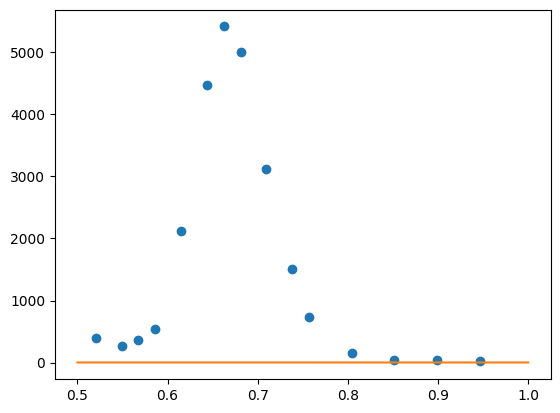

In [ ]:
x_points = np.linspace(0.5, 1, 100)

plt.plot(x_data, y_data, linestyle='', marker='.', markersize=12) # This line makes the same plot as plt.scatter, but avoids some quirks in matplotlib.
# Try replacing this with plt.scatter(x_data, y_data) and see what happens!
# plt.scatter(x_data, y_data)

y_gauss = gauss(x_points, mu, sigma, amp)
plt.plot(x_points, y_gauss)
plt.show()

### Goodness-of-fit

How good was your guess? How do you even answer that question?

<details>
<summary>Answer</summary>
Let's use something called the $L_2$ norm: $||y - f(x)||^2$ to get a metric of the difference between our data and our function. This may sound and look fancy, but all it's doing is calculating the distance at each x-value in the data between the data y-value and the function y-value. Then, it squares those distances and adds them all together.

This is defined by `np.sum((y_data - y_data_gauss)**2)` for our setup.
</details>

In [ ]:
y_data_gauss = gauss(x_data, mu, sigma, amp)
l2_norm = np.sum((y_data - y_data_gauss)**2)
print(l2_norm)


92104170.59783581


Try changing the parameters to something bad and see what happens to the value of `l2_norm`. Since this definition of the $L_2$ norm is not normalized by something like a standard deviation of the data, it can't tell us in absolute terms how good our funciton fits, but it can at least tell us if one set of parameters fits better than another. This is really helpful!

In [ ]:
mu = 
sigma = 
amp = 

l2_norm = np.sum((y_data - gauss(x_data, mu, sigma, amp))**2)
print(l2_norm)


92145169.9069555


But, how do we know when we have a best fit? How would you try to figure it out?

Thankfully, we don't have to create our own method to do this. The smart people working on the `scipy` package have already built an optimized tool for us to use! It's called the `curve_fit` function as is part of the `scipy.optimize` sub-package.

### Fitting

In [ ]:
import scipy.optimize

`scipy.optimize.curve_fit` is a type of minimization function. In this case, the function finds the parameters of another given function that minimize the $L_2$ norm between the data points and what our gauss function thinks the data points should be at a given x.

A quick, useful way to see what a function does without having to google it is to use the built-in python `help` function.

In [ ]:
help(scipy.optimize.curve_fit)

Help on function curve_fit in module scipy.optimize._minpack_py:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, *, full_output=False, **kwargs)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``.
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...). It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : array_like
        The independent variable where the data is measured.
        Should usually be an M-length sequence or an (k,M)-shaped array for
        functions with k predictors, and each element should be float
        convertible if it is an array like object.
    ydata : array_like
        The dependent data, a length M array - nominally ``f(xdata, ...)``.
    p0 : array_like, optional
        Initial 

That gave us a lot of information about the `curve_fit` function! As you can see, `curve_fit` takes a function as its first parameter, and it tells us exactly how to arrange the parameters of that function (thankfully, our `gauss` function should already have this form). The next two parameters `curve_fit` takes are `xdata` and `ydata` (`x_data` and `y_data` as we defined them). The rest are optional and will be talked about briefly at the end of this lecture.

Let's try calling help on the `gauss` function we defined above.

In [ ]:
help(gauss)

Help on function gauss in module __main__:

gauss(x: Union[float, <built-in function array>], mean: float, std: float, amp: float) -> Union[float, <built-in function array>]
    A general implementation of a gaussian function.
    
    f(x) = A * e^(-1/2 * ((x-mu)/sigma)^2)
    To normalize this function, you would multiply by sigma * sqrt(2*pi)/A.
    
    Args:
        x: the input for f(x).
        mean: the center of the gaussian function (mu).
        std: the standard deviation of the gaussian functino (sigma).
        amp: the scaling amplitude of the gaussian function (A).
    
    Returns:
        The amplitude of the gaussian function for a given x.



Now, let's use `curve_fit` to fit the data to our function!

In [ ]:
# The variable names popt and pcov come from the curve_fit function. We will get into what they mean soon!
popt, pcov = scipy.optimize.curve_fit(gauss, x_data, y_data)

print(popt)
print(pcov)

[6.69130766e-01 4.13010233e-02 5.33663054e+03]
[[ 1.49349449e-06 -5.34505344e-08  8.46692964e-03]
 [-5.34505344e-08  1.32738640e-06 -7.24032279e-02]
 [ 8.46692964e-03 -7.24032279e-02  1.44313779e+04]]


Do you know what `popt` is? How would you find out?

<details>
<summary>Answer</summary>

If you look back at the `help` output from `curve_fit`, `popt` is a list of the best-fit parameters of our gauss function for this data. The parameters in the list are in the order that the parameters are listed in our `gauss` function (`mean`, `std`, `amp`). Let's try plotting the data, our guess, and the best fit from `curve_fit`!
</details>

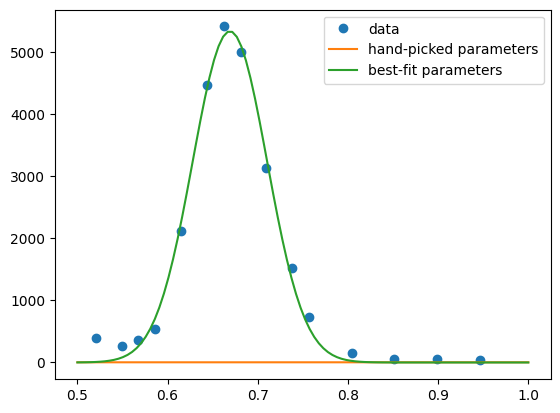

In [ ]:
mu = 1
sigma = 2
amp = 3
x_points = np.linspace(0.5, 1, 100)
plt.plot(x_data, y_data, linestyle='', marker='.', markersize=12, label='data')  # The parameter "label" gives a name to the data series.
plt.plot(x_points, gauss(x_points, mu, sigma, amp), label='hand-picked parameters')
plt.plot(x_points, gauss(x_points, *popt), label='best-fit parameters')  # using "*popt" is a nice python trick that expands popt into the three individual values it contains.
plt.legend()  # This function produces a legend of the plots and their names.
plt.show()

How close was your guess to the best fit?

### Interpreting Fitting Errors
`pcov` is a little more complicated. `pcov` is what's called the "covariance matrix" of the best fit parameters. As shown in the `help` output, the standard deviations of the parameters can be recovered from this matrix in the following way: `perr = np.sqrt(np.diag(pcov))`

Since we aren't teaching linear algebra here, all of the matrix manipulations will be given to you. All that needs to be taken away from this is how to read this specific matrix.

In [ ]:
perr = np.sqrt(np.diag(pcov)) # This comes straight from the curve_fit help output.

# This is an example of string formatting in python.
# Each set of {} corresponds to a parameter passed to .format().
# .3e means "format this number in scientific notation with 3 digits after the decimal".
# using "*perr" is a nice python trick that expands perr into the three individual values it contains.
# All of this is out of the scope of this lecture, but it's good to get exposure to these things.
# Just look at how nice the out put looks!
print('s_mu = {:.3e}, s_sigma = {:.3e}, s_amp = {:.3e}'.format(*perr))

s_mu = 1.222e-03, s_sigma = 1.152e-03, s_amp = 1.201e+02


The covariance matrix looks like this for the parameters in our `gauss` function

\begin{bmatrix}
s_{\mu}^2 & cov(\mu, \sigma) & cov(\mu, A)\\
cov(\sigma, \mu) & s_{\sigma}^2 & cov(\sigma, A)\\
cov(A, \mu) & cov(A, \sigma) & s_A^2
\end{bmatrix}

Where $s_x^2$ is the variance of a parameter $x$ and $s_x$ is its estimated standard deviation, and $cov(x, y)$ is the covariance between parameters $x$ and $y$.

Can you guess what `np.sqrt(np.diag(pcov)` does now?

Covariance can be difficult to visualize. It's often much easier to look at something called the "correlation coefficient" instead. The correlation coefficients can be easily found from the covariance matrix by using this transformation:

$cor(x, y) = \frac{cov(x, y)}{s_x s_y}$

Performing this transformation on the covariance matrix gives the correlation matrix, which looks like this:

\begin{bmatrix}
1 & cor(\mu, \sigma) & cor(\mu, A)\\
cor(\sigma, \mu) & 1 & cor(\sigma, A)\\
cor(A, \mu) & cor(A, \sigma) & 1
\end{bmatrix}

The code for this is a bit beyond the scope of this lecture, so it has been done for you below.

In [ ]:
perr_transpose = np.atleast_2d(perr).T
pcor = pcov / perr / perr_transpose
print(pcor)

[[ 1.         -0.03796222  0.05767269]
 [-0.03796222  1.         -0.52312484]
 [ 0.05767269 -0.52312484  1.        ]]


The correlation coefficients say how related the parameters are (-1 = perfectly anti-correlated, 0 = perfectly independent, 1 = perfectly correlated). As you can see here, the mean is independent from both of the other parameters, but the standard deviation and the amplitude are fairly anti-correlated. Any guesses on why this would be?

<details>
<summary>Answer</summary>

As you increase the amplitude, the plot stretches up, moving the curve away from many points in the bell curve. This can be compensated for by reducing the standard deviation, bringing the sides of the bell curve in toward the points. The converse is also true.
</details>

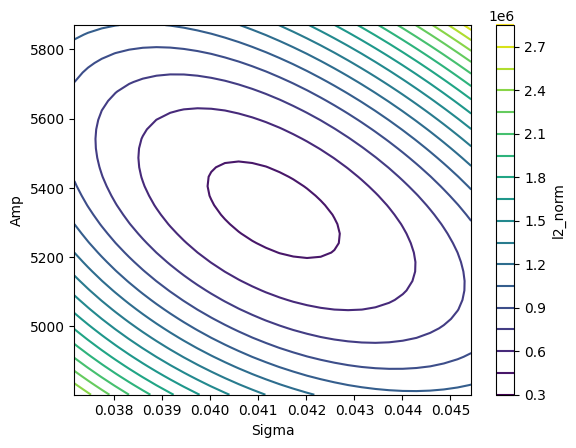

In [ ]:
# We'll fix mu to the optimal value
mu = popt[0]

# Sigma and amp are varied around the optimal value
nsigma= 30
sigma = np.linspace(.9*popt[1], 1.1*popt[1],nsigma)

namp = 40
amp = np.linspace(.9*popt[2], 1.1*popt[2], namp)

# Now we find l2_norm for each combination
l2_norm = np.zeros([nsigma, namp])

for i in range(nsigma):
    for j in range(namp):
        y_data_gauss = gauss(x_data, mu, sigma[i], amp[j])
        l2_norm[i,j] = np.sum((y_data - y_data_gauss)**2)
        
# Plot

# We use meashgrid to create 2D coordinate matrices out of the 1D lists
Amp, Sigma = np.meshgrid(amp, sigma)

#plt.scatter(Sigma, Amp, c = l2_norm)
plt.contour(Sigma, Amp, l2_norm, levels = 20)

plt.xlabel("Sigma")
plt.ylabel("Amp")

plt.colorbar(label = "l2_norm")

The type of minimization that `curve_fit` does is called a least-squares fit. To do this least-squares fit, the function uses a numerical method called "lm" by default. It's generally a good idea to try to fit using the defaults. Sometimes, this won't work, and you will need to take more steps. The procedure is generally as follows:

1. Add bounds and initial guesses to the parameters so that the minimizer knows where to look for the best-fit.
1. Add a Jacobian matrix to tell the minimizer how quickly to change the parameters relative to each other.
1. Try different metrics to determine goodness-of-fit and/or different minimizers.
1. Switch to some form of deterministic machine learning algorithm.
1. Switch to a non-deterministic machine learning algorithm.

These steps get progressively more complicated and time consuming. Between every step you should be asking yourself whether or not there isn't some better way to formulate your problem.

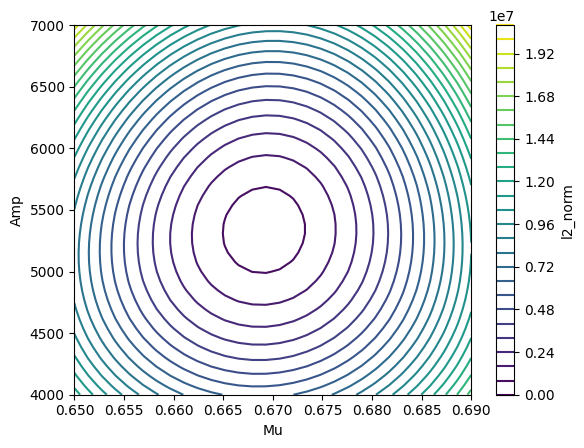

In [ ]:
nmu= 30
namp = 40

mu = np.linspace(.65,.69,nsigma)
amp = np.linspace(4000,7000, namp)

Amp, Mu = np.meshgrid(amp, mu)

l2_norm = np.zeros([nmu, namp])

for i in range(nmu):
    for j in range(namp):
        y_data_gauss = gauss(x_data, mu[i], popt[1], amp[j]) # Finish this line to get y_gauss at the x_data.
        l2_norm[i,j] = np.sum((y_data - y_data_gauss)**2)# Finish this line to calculate the L_2 norm.
        
plt.contour(Mu, Amp, l2_norm, levels = 30)

plt.xlabel("Mu")
plt.ylabel("Amp")

plt.colorbar(label = "l2_norm")

## Image Processing
<a id='improc'></a>

**Introduction to Image Processing**

Image processing is a very useful tool for scientists in the lab, and for everyday uses as well. For, example, an astronomer may use image processing to help find and recognize stars, or a self driving car may use it to stay in the correct lane.

This lecture will teach you some of the fundamental tools of image processing so that you can use it in your own studies/applications.

What is an image, *really*?

![alt text](https://snipboard.io/xf3naG.jpg)

*Figure 1:* Felix the cat

As we can see from Felix the cat, images are just a coordinate system in which each block (x,y) has a value associated to it. These values are later interpreted as a color.

For example, in Figure 1, we would be describing two colors (black and white) and we could describe them using 1's and 0's. In general, 0 is taken to mean the absence of color, which means that 0 = black and 1 = white. Putting these ideas together, we can see that each point in an image requires three peices of information:


1.   x - position
2.   y - position
3.   color (1 or 0)

So if we were instructing a computer to produce even a small image, we would need to give it a large list of numbers.

---
![alt text](https://i.imgur.com/fU7Yfre.png)

*Figure 2:* Checker board pattern

For example, suppose we wanted the computer to produce the checkboard patter that we see in Figure 2. If we make a list of the information the computer needs, we can format it like (x-coordinate, y-coordinate, color) and the whole list would be

(1,1,1), (1,2,0), (1,3,1), (2,1,0), (2,2,1), (2,3,0), (3,1,1), (3,2,0), (3,3,1)

---
![alt text](https://i.imgur.com/ZraCTP1.png)

*Figure 3:* Images

To make the image making process easier, people decided to ditch the traditional coordinate system and use matricies instead! However, because both systems *work* and because sometimes one method can be more convenient than the other, both still exists, but they have different names. 

When you use a coordinate system to instruct the computer, that's a **scatter plot**. When you use a matrix, that's called an **image**.

To instruct the computer to make a scatter plot of the 9 square checkerboard, we had to give it 3x9=27 numbers. To insturct it to make an image of the checkerboard, we only have to give it 9 numbers, but they have to be in the correct *order*. Specifically, the order looks like this:



```
image = [ [1, 0, 1],
          [0, 1, 0],
          [1, 0, 1] ]
```

Each location that we assign a value to is considered a pixel. Thus, we have created an image that is 3 pixels wide and 3 pixels tall, and it has a total  of 9 pixels.

When we watch youtube videos at 1080p, we are actually looking at pictures that are 1080 pixels tall and 1920 pixel wide. These images have a total of 1080x1920 = 2,073,600‬ pixels. If we round to the nearest million, there are approximately 2 million pixels in each image. This would be considered a 2 Mega Pixel (MP) image. This is the same number phone manufactures using when talking about how many megapixels their newest device has.





---




### Exercise 1: Making images
![alt text](https://imgur.com/uBM3KC6.png)

Can you make the image matrix for the checker board that is shown above?




In [ ]:
# set exercise1 equal to your matrix


We can check if we got this right by having the computer make the image. To do this, we will use matplotlib's "plt.imshow" function, which takes in *matricies* and turns them into images.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(exercise1)

Now, we have gotten a figure that *looks* like the correct board, but the colors are wrong. To fix this, we need to tell the computer that we want to see the image in grayscale. We do this by inserting a "cmap" into the plt.imshow function. "cmap" stands for "color map" and in this case, we will set it to grayscale

In [ ]:
from matplotlib import cm
plt.imshow(exercise1, cmap=cm.gray)

If the output of the code above does not match the chekerboad in the exercise try again or ask for help. Notice how the order of the numbers is important to final image.

### Exercise 2: Making scatter plots

Now we will use a scatter plot to create the checkerboard. This time we will use matplotlib's "plt.scatter" function to create the figure. 

In the code below, we have given you a list a coordinates and values for the blocks at those coordinates. Correct the list so that it reproduces the checkerboard from Exercise 1.

In [ ]:
exercise2 = [[1,1,0], [1,2,1],  [1,3,0], [2,1,1], [2,2,0], [2,3,0], [3,1,1], [3,2,0], [3,3,1]]
exercise2 = np.array(exercise2)

x_coordinates = exercise2[::,0]
y_coordinates = exercise2[::,1]
values = exercise2[::,2]

plt.scatter(x_coordinates, y_coordinates, c=values, marker='s',s = 5184, cmap=cm.gray)
plt.gca().set_aspect('equal')
plt.xlim([-0.5, 2.5])
plt.ylim([-0.5, 2.5])

NameError: ignored

Recall that the order of the numbers doesn't matter for scatter plots. To see this, go back to the previous code block, and swith the order of the exercise2 list. Even though you change the order, the image produced doesn't change.

### Image Arithmatic (Introduction)

Now that we have covered the fundamentals, we can start diving into image manipulations, starting with slices and arithmatic. 

There are many tools we can use to learn about image processing. Today, we will be using Scikit-Image, a free to use and easy to learn python library, and we'll start by looking at an image of an insect.

In [ ]:
# first we import the input/output module from skimage called "io". io lets us 
# read files on the computer or online
from skimage import io
insect = io.imread('https://matplotlib.org/3.1.1/_images/stinkbug.png')

#we can take a look at the image we just imported once again using image show.
plt.imshow(insect,  cmap=cm.gray, vmin=0, vmax=255)
plt.colorbar()

Remember that, since we are working with images, the information is stored inside of a matrix. Lets take a look at that matrix.

In [ ]:
# show the array
print(insect)

The first thing we notice is that this image is no longer just 1's and 0's. The numbers go from 0 to 256, and recalling that 0 = absence of light, we take 0=black and 256=white. All of the numbers between 0 and 255 are various shades of gray. 

Next, we can see that there are ellipses inside of the matrix. This is python's way of telling us that there are *so* many positions and values that writing them all out would take a huge amount of space on the screen, and a list that big is hard to read.

In the checker board example we had an image that had 3 rows and 3 columns. We can check the shape of any matrix by adding ".shape" after its name. Let's see the shape of the insect image

In [ ]:
# show the shape of the array
print(insect.shape)

It looks like this matrix has 375 rows and 500 columns, so we expect it to be wider than it is tall. We can take a look at the value of a specific pixel by calling its location like this:

In [ ]:
# show the value of the pixel in the 100th row and 200th column
print(insect[100,200])

**Cropping**

Cropping an image is very simple. Basically, we have a really big matrix, but want to get rid of the rows and columns that we are not interestesd in. We can do this by slicing the matrix usng brackets [ ] as show below:

In [ ]:
# display only the section of the image between columns 150 - 350 and rows 200 - 400
plt.imshow(insect[50:150,150:275],  cmap=cm.gray, vmin=0, vmax=255)

In this case we cropped to the left most antenna.

### Exercise 3: Cropping

By altering the slice locations of the image matrix, can you crop the photo to focus in on the insect's face?

In [ ]:
plt.imshow(insect[insert_your_slice_here], cmap=cm.gray, vmin=0, vmax=255)

### Image Arithmatic (continued)

since we are still working with a matrix, we are free to do normal math operations on it. For example, we can divide all of the values in the image by 2. This should darken the image, lets try it:

In [ ]:
#divide the image by two and display it
plt.imshow(insect//2, cmap=cm.gray, vmax=255, vmin=0)
plt.colorbar()

To brighten the image, we can instead multiply the matrix by 1.5:

In [ ]:
#multiply the image by 1.5 and display it
plt.imshow((insect//2)*3, cmap=cm.gray, vmax=255, vmin=0)
plt.colorbar()

We can also transform the image. First, let's try a rotation:

In [ ]:
# rotate image 90 degrees
plt.imshow(np.rot90(insect), cmap=cm.gray, vmax=255, vmin=0)

We can also use np.flip() to reflect the image about the horizontal or vertical axes, e.g.

In [ ]:
#flip image vertically
plt.imshow(np.flip(insect, axis=0), cmap=cm.gray, vmax=255, vmin=0)

In [ ]:
#flip image horizontally
plt.imshow(np.flip(insect, axis=1), cmap=cm.gray, vmax=255, vmin=0)

We can also directly modify the values of the matrix elements ourselves. For example, if we want to set a portion of the image to solid black, we can do so by setting all of the pixels in that region to zero, like this:

In [ ]:
# set the region x=[50,100] and y=[50,100] to zero and display
img = np.copy(insect)
img[50:100,50:100] = 0
plt.imshow(img, cmap=cm.gray, vmax=255, vmin=0)

### Exercise 4: Censorship

By altering the code below, censor the insects face with a white block. Remember that white = 255

In [ ]:
img = np.copy(insect)
img['insert slice'] = 'insert value'
plt.imshow(img, cmap=cm.gray, vmax=255, vmin=0)


### Exercise 5: Inversion
By altering the values in the array, you can also do things like invert the image colors. Try that here:

In [ ]:
#fill in the line below to get an inverted insect image
tcesni = #???
plt.imshow(tcesni, cmap=cm.gray, vmax=255, vmin=0)

NameError: ignored

### Exercise 6: Gradients

In [ ]:
#  Make a fading image from top to bottom (hint: multiply the image by a gradient you can create)
